# Restaurant Review Sentiment Analysis


In [1]:
#Loading the important libraries
import numpy as np
import pandas as pd


In [2]:
#Loading the dataset of Restaurant Reviews
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
#Shape of the dataset
df.shape


(1000, 2)

In [4]:
#Columns of the dataset
df.columns


Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
#Showcasing the first 15 rows of the dataset
df.head(15)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [7]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
#Showcasing the last 15 rows of the dataset
df.tail(15)

,Review,Liked
985,The problem I have is that they charge $11.99 ...,0
986,Shrimp- When I unwrapped it (I live only 1/2 a...,0
987,"It lacked flavor, seemed undercooked, and dry.",0
988,It really is impressive that the place hasn't ...,0
989,I would avoid this place if you are staying in...,0
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0


In [9]:
#Importing the natural language toolkit 
import nltk 


In [10]:
#Regular expression specifies a set of strings that matches it, and the functions in this module let you check if a particular string matches or not.
import re

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to C:\Users\Rina
[nltk_data]     Pandy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
# Now we need to clean the reviews for that we need to lowercase the words, eliminate stop words, tokenize and do stemming and


In [13]:
corpus = []
for i in range(0,1000):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])
    
    #Lowercasing the letters 
    review = review.lower()
    
    #Tokenizing review by words and words
    review_words=review.split()
    
    #Eliminating the stopwords
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    #Stemming the words in the review
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    #Joining the stemmed words
    review = ' '.join(review)

   #Creating a corpus
    corpus.append(review)
    
    
    
    

In [14]:
#Showcasing the reviews in the corpus 
corpus [0:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

In [22]:
import pickle

In [23]:
#Creating the BAG OF WORDS MODEL i.e. a method to extract features from the text documents 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [27]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [28]:
#Doing the train,test, split where test_datasize percentage is 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [30]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'restaurant-sentiment-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [31]:
#Predicting the test results 
y_pred = classifier.predict(X_test)



In [35]:
# Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("The Accuracy score is: {}".format(round(score1,2)))



The Accuracy score is: 78.5%


In [36]:
#Precision
from sklearn.metrics import precision_score
score2 = precision_score(y_test,y_pred)
print("The Precision score is: {}".format(round(score2,2)))



The Precision score is: 0.78


In [37]:
#Recall
from sklearn.metrics import recall_score
score3= recall_score(y_test,y_pred)
print("The Recall score is: {}".format(round(score3,2)))



The Recall score is: 0.82


In [39]:
print("The Accuracy, Precision, and Recall Scores:")
print("Accuracy score = {}".format(round(score1,2)))
print("Precision score = {}".format(round(score2,2)))
print("Recall score = {}".format(round(score3,2)))

The Accuracy, Precision, and Recall Scores:
Accuracy score = 0.78
Precision score = 0.78
Recall score = 0.82


In [45]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[73, 24],
       [19, 84]], dtype=int64)

In [47]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(60.0, 0.5, 'Actual Label')

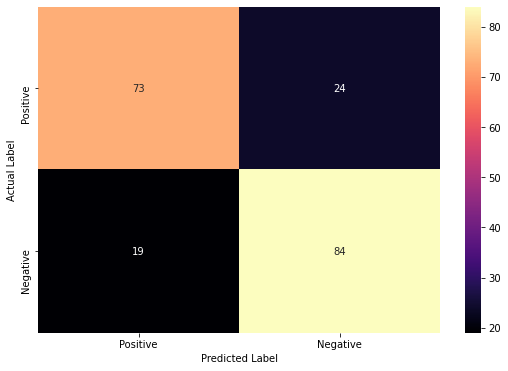

In [51]:
plt.figure(figsize = (9,6))
sns.heatmap(cm, annot=True, cmap="magma", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [57]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("The accuracy score for alpha {} is {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('--------------------------------------------')
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

The accuracy score for alpha 0.1 is 78.0%
The accuracy score for alpha 0.2 is 78.5%
The accuracy score for alpha 0.3 is 78.0%
The accuracy score for alpha 0.4 is 78.0%
The accuracy score for alpha 0.5 is 77.5%
The accuracy score for alpha 0.6 is 77.5%
The accuracy score for alpha 0.7 is 77.5%
The accuracy score for alpha 0.8 is 77.0%
The accuracy score for alpha 0.9 is 76.5%
The accuracy score for alpha 1.0 is 76.5%
--------------------------------------------
--------------------------------------------
--------------------------------------------
The best accuracy is 78.5% with alpha value 0.2


In [58]:
#Since the best accuracy score is 78.5 % for alpha 0.2
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [59]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [60]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [61]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [62]:
# Predicting values
sample_review = 'Delicious'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
